
Training No Regularization model...
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.9063 - val_loss: 0.1654 - val_accuracy: 0.9517
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1420 - accuracy: 0.9582 - val_loss: 0.1230 - val_accuracy: 0.9621
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.9704 - val_loss: 0.1033 - val_accuracy: 0.9686
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9772 - val_loss: 0.0904 - val_accuracy: 0.9724
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0795 - val_accuracy: 0.9758

Training L1 Regularization model...
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.6175 - accuracy: 0.8744 - val_loss: 0.8905 - val_accuracy: 0.9098
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7878 

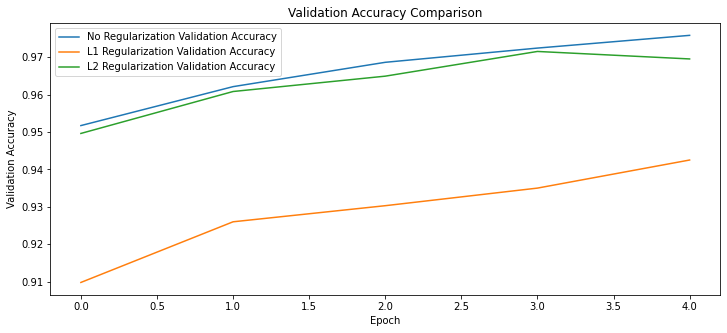

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Function to create models
def create_model(regularizer=None):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizer, input_shape=(784,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train models
models = {
    "No Regularization": create_model(),
    "L1 Regularization": create_model(regularizers.l1(0.001)),
    "L2 Regularization": create_model(regularizers.l2(0.001))
}

history = {}
for name, model in models.items():
    print(f"\nTraining {name} model...")
    history[name] = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=1)

# Plot results
plt.figure(figsize=(12, 5))
for name, hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.show()
